In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plot
import seaborn as sb
from PIL import Image

# x_train

In [2]:
images_test='test/'
images_train='train/'

#Creating a list to keep track of each model's performance
AccuracyList = []
LossList = []

#Converting all the images into rgb arrays. Coding them seperately for ease of testing purposes. 
    #(So that we can test each item individually)

#Added "Try-catch" block as image number not in running sequence.
    #Used to skip image number if file not found. 
    #Okay to use a bigger range as if there is an error, try-catch will skip the image

#img_raw.convert to convert file into RGB so that array will only have 3 dimension 
    #as some pictures with transparent background have 4 dimensions ( extra alpha dimension ) 


#Creating X_train from images
#Apple
x_train_apple = None 
for i in range(1,77): #There are apple images ranging from 1 - 76
    try:
        img_raw = Image.open(images_train + 'apple_{0}.jpg'.format(i))
        img_raw = img_raw.convert('RGB')
        img_tiny = img_raw.resize((64,64))
        if x_train_apple is None:
            x_train_apple=img_tiny
        else:
            x_train_apple = np.concatenate((x_train_apple,img_tiny))
    except:
        continue
x_train_apple = x_train_apple.reshape(-1,64,64,3)

#Banana
x_train_banana = None 
for i in range(1,77): #There are banana images ranging from 1 - 76
    try:
        img_raw = Image.open(images_train + 'banana_{0}.jpg'.format(i))
        img_raw = img_raw.convert('RGB')
        img_tiny = img_raw.resize((64,64))
        if x_train_banana is None:
            x_train_banana=img_tiny
        else:
            x_train_banana = np.concatenate((x_train_banana,img_tiny))
    except:
        continue
x_train_banana = x_train_banana.reshape(-1,64,64,3)

#Orange
x_train_orange = None 
for i in range(1,77): #There are oranges image ranging from 1-76
    try:
        img_raw = Image.open(images_train + 'orange_{0}.jpg'.format(i))
        img_raw = img_raw.convert('RGB')
        img_tiny = img_raw.resize((64,64))
        if x_train_orange is None:
            x_train_orange=img_tiny
        else:
            x_train_orange = np.concatenate((x_train_orange,img_tiny))
    except:
        continue
x_train_orange = x_train_orange.reshape(-1,64,64,3)

#Mixed
x_train_mixed = None
for i in range(1,21):  #There are oranges image ranging from 1-20
    try:
        img_raw = Image.open(images_train + 'mixed_{0}.jpg'.format(i))
        img_raw = img_raw.convert('RGB')
        img_tiny = img_raw.resize((64,64))
        if x_train_mixed is None:
            x_train_mixed=img_tiny
        else:
            x_train_mixed = np.concatenate((x_train_mixed,img_tiny))
    except:
        continue

x_train_mixed = x_train_mixed.reshape(-1,64,64,3)


#To Join All Four Arrays ( concatenate all arrays into single training package)
x_train = np.concatenate((x_train_apple,x_train_banana,x_train_orange,x_train_mixed))
x_train.shape

C:\Users\T450\anaconda3\envs\PythonEx\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(240, 64, 64, 3)

# x_test

In [3]:
#Similar to Training set, convert all test folder images into RGB array.

#Range is as per image numbering in folder. 
    #Okay to put a bigger range as if there is an error, try-catch will skip the image

x_test_apple = None 
for i in range(77,96):
    try:
        img_raw = Image.open(images_test + 'apple_{0}.jpg'.format(i))
        img_raw = img_raw.convert('RGB')
        img_tiny = img_raw.resize((64,64))
        if x_test_apple is None:
            x_test_apple=img_tiny
        else:
            x_test_apple = np.concatenate((x_test_apple,img_tiny))
    except:
        continue
x_test_apple = x_test_apple.reshape(-1,64,64,3)
x_test_banana = None 
for i in range(77,95):
    try:
        img_raw = Image.open(images_test + 'banana_{0}.jpg'.format(i))
        img_raw = img_raw.convert('RGB')
        img_tiny = img_raw.resize((64,64))
        if x_test_banana is None:
            x_test_banana=img_tiny
        else:
            x_test_banana = np.concatenate((x_test_banana,img_tiny))
    except:
        continue
x_test_banana = x_test_banana.reshape(-1,64,64,3)

x_test_orange = None 
for i in range(77,96):
    try:
        img_raw = Image.open(images_test + 'orange_{0}.jpg'.format(i))
        img_raw = img_raw.convert('RGB')
        img_tiny = img_raw.resize((64,64))
        if x_test_orange is None:
            x_test_orange=img_tiny
        else:
            x_test_orange = np.concatenate((x_test_orange,img_tiny))
    except:
        continue
x_test_orange = x_test_orange.reshape(-1,64,64,3)

x_test_mixed = None 
for i in range(21,26):
    try:
        img_raw = Image.open(images_test + 'mixed_{0}.jpg'.format(i))
        img_raw = img_raw.convert('RGB')
        img_tiny = img_raw.resize((64,64))
        if x_test_mixed is None:
            x_test_mixed=img_tiny
        else:
            x_test_mixed = np.concatenate((x_test_mixed,img_tiny))
    except:
        continue
x_test_mixed = x_test_mixed.reshape(-1,64,64,3)


#Here, we combine all the image arrays (x_train and x_test sets) into one array of X, 
    #so that we can use test_train_split to help RANDOMIZE images into training and testing sets


x = np.concatenate((x_train,x_test_apple,x_test_banana,x_test_orange,x_test_mixed))
x.shape # in total we should have all 300 Image arrays here as train has 240 images and test has 60 images.

(300, 64, 64, 3)

# y_train, y_test

In [4]:
#Creating the Y set arrays with one-hot encoding

#Creating Y_Train manually, based off the image set in train folder.

apple = [[1,0,0,0]]
banana = [[0,1,0,0]]
orange = [[0,0,1,0]]
mixed = [[0,0,0,1]]

y_train = None
for i in range (0,240):
    if y_train is None:
        y_train=apple
    elif i <= 74 : # 75 Images of Apple in Train set
        y_train=np.concatenate((y_train,apple))
    elif i > 74 and i <= 147: # 73 Images of Banana in Train Set
        y_train=np.concatenate((y_train,banana))
    elif i > 147 and i <= 219: # 72 Images of Oranges in Train Set
        y_train=np.concatenate((y_train,orange))
    elif i>=220: #20 Images of mixed fruits in Train Set
        y_train=np.concatenate((y_train,mixed))


#Creating Y_Test manually, based off the image set in test folder.

y_test= None
for k in range(0,60):
    if y_test is None:
        y_test=apple
    elif k <=19 : # 19 Images of apple in test set
        y_test=np.concatenate((y_test,apple))
    elif k > 19 and k<=37: #18 Images of Banana in test set
        y_test=np.concatenate((y_test,banana))
    elif k>37 and k<=54: #18 Images of Orange in test set
        y_test=np.concatenate((y_test,orange))
    elif k>=55: #5 Images of Mixed fruit in test set
        y_test=np.concatenate((y_test,mixed))      


y = np.concatenate((y_train,y_test))

y.shape
# in total we should have all 300 one-hot encoded arrays here which will tally with the X arrays

(300, 4)

# Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x,y, random_state = 25) 

#Using Train Test Split to randomize the training and testing set to allow us to have 
    #higher accuracy as we believe that if we do not do this, 
    #the training / test set is in sequence and not randomized. 
    #E.g. the model will start with apple images first, then banana images, etc.

In [6]:
#normalize the image arrays as there are 255 pixel values           

x_train_norm = x_train/ 255
x_test_norm = x_test / 255

# Model Creation, Training & Evaluation

In [7]:
#Basic Model Creation with CNN layers.
#No data augmentation 
#Added dropout layers for added randomization of sample set

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(5, 5),
    activation='relu',
    input_shape=(64,64,3)))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))    
model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(5, 5),
    activation='relu',
    ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))    
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=250, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))



In [8]:
#Using Categorical_crossentropy as we are using ONE HOT Encoding.
#Base metrics would be to find accuracy
model.compile(loss='categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

In [9]:
#Training with 50 epochs (50 periods)
hist = model.fit(x_train_norm,y_train,epochs=50,validation_split=0.3)


Epoch 1/50
5/5 [==============================] - 2s 283ms/step - loss: 1.5416 - accuracy: 0.2930 - val_loss: 1.3568 - val_accuracy: 0.3382
Epoch 2/50
5/5 [==============================] - 1s 206ms/step - loss: 1.3574 - accuracy: 0.3439 - val_loss: 1.2692 - val_accuracy: 0.6765
Epoch 3/50
5/5 [==============================] - 1s 219ms/step - loss: 1.2879 - accuracy: 0.4204 - val_loss: 1.0867 - val_accuracy: 0.7941
Epoch 4/50
5/5 [==============================] - 1s 207ms/step - loss: 1.1131 - accuracy: 0.5732 - val_loss: 0.8624 - val_accuracy: 0.7941
Epoch 5/50
5/5 [==============================] - 1s 208ms/step - loss: 1.0109 - accuracy: 0.6242 - val_loss: 0.7042 - val_accuracy: 0.7647
Epoch 6/50
5/5 [==============================] - 1s 207ms/step - loss: 0.8406 - accuracy: 0.6561 - val_loss: 0.7794 - val_accuracy: 0.7500
Epoch 7/50
5/5 [==============================] - 1s 209ms/step - loss: 0.8719 - accuracy: 0.7006 - val_loss: 0.6315 - val_accuracy: 0.8382
Epoch 8/50
5/5 [====

In [10]:
#Evaluate model accuracy using test sets

loss, accuracy = model.evaluate(x_test_norm,y_test)

#Adding model evaluation result to list
AccuracyList.append(accuracy)
LossList.append(loss)

3/3 [==============================] - 0s 37ms/step - loss: 1.0568 - accuracy: 0.8800


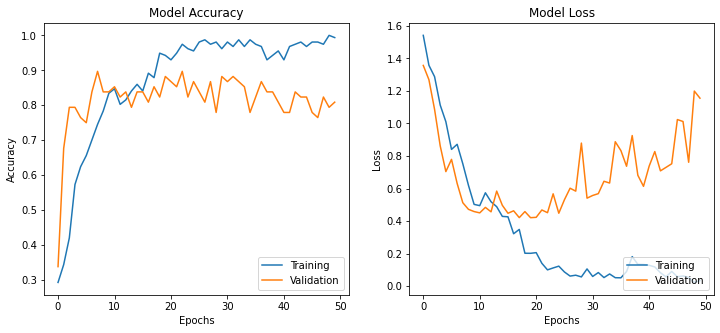

In [11]:
#Plotting accuracy and loss graphs
fig, ax = plot.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax[0].plot(hist.history['accuracy'])
ax[0].plot(hist.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend(['Training','Validation'],loc='lower right')

ax[1].plot(hist.history['loss'])
ax[1].plot(hist.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
ax[1].legend(['Training','Validation'],loc='lower right')

plot.show()


In [12]:
#Edit model to add data augmentation layer - RandomFlip

model = tf.keras.Sequential()

#Adding Data augmentation layers - flip, rotate, zoom

model.add(tf.keras.layers.RandomFlip(input_shape=(64,64,3))) #active layer
#model.add(tf.keras.layers.RandomRotation((0.3)))
#model.add(tf.keras.layers.RandomZoom(0.2))


model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(5, 5),
    activation='relu',
    input_shape=(64,64,3)))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))    
model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(5, 5),
    activation='relu',
    ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(tf.keras.layers.Conv2D(
    filters=128,
    kernel_size=(5, 5),
    activation='relu',
    ))
    
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))  
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=200, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

In [14]:
hist = model.fit(x_train_norm,y_train,epochs=50,validation_split=0.3)

Epoch 1/50
5/5 [==============================] - 4s 368ms/step - loss: 1.3873 - accuracy: 0.2930 - val_loss: 1.2787 - val_accuracy: 0.3235
Epoch 2/50
5/5 [==============================] - 1s 278ms/step - loss: 1.3506 - accuracy: 0.3185 - val_loss: 1.2760 - val_accuracy: 0.4559
Epoch 3/50
5/5 [==============================] - 1s 264ms/step - loss: 1.3476 - accuracy: 0.2930 - val_loss: 1.2818 - val_accuracy: 0.3382
Epoch 4/50
5/5 [==============================] - 1s 281ms/step - loss: 1.2917 - accuracy: 0.3694 - val_loss: 1.1645 - val_accuracy: 0.5735
Epoch 5/50
5/5 [==============================] - 1s 276ms/step - loss: 1.1472 - accuracy: 0.5541 - val_loss: 0.8758 - val_accuracy: 0.6176
Epoch 6/50
5/5 [==============================] - 1s 274ms/step - loss: 1.0053 - accuracy: 0.5796 - val_loss: 0.7600 - val_accuracy: 0.7941
Epoch 7/50
5/5 [==============================] - 1s 267ms/step - loss: 0.8184 - accuracy: 0.7006 - val_loss: 0.8090 - val_accuracy: 0.7353
Epoch 8/50
5/5 [====

In [15]:
loss, accuracy = model.evaluate(x_test_norm,y_test)

AccuracyList.append(accuracy)
LossList.append(loss)


3/3 [==============================] - 0s 48ms/step - loss: 0.4412 - accuracy: 0.9200


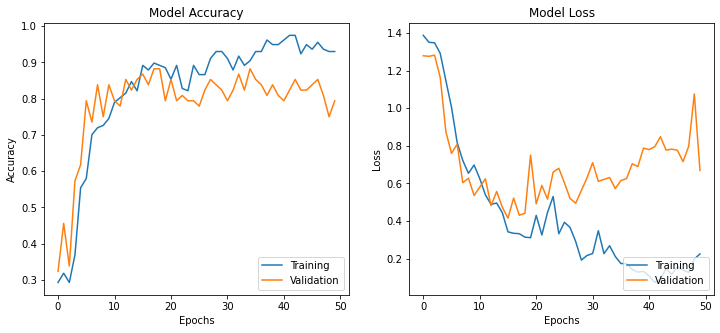

In [16]:
fig, ax = plot.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax[0].plot(hist.history['accuracy'])
ax[0].plot(hist.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend(['Training','Validation'],loc='lower right')



ax[1].plot(hist.history['loss'])
ax[1].plot(hist.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
ax[1].legend(['Training','Validation'],loc='lower right')







plot.show()


In [17]:
#Edit model to use data augmentation layer - RandomRotation

model = tf.keras.Sequential()

#Adding Data augmentation layers - flip, rotate, zoom

#model.add(tf.keras.layers.RandomFlip(input_shape=(64,64,3)))
model.add(tf.keras.layers.RandomRotation((0.3))) #active layer
#model.add(tf.keras.layers.RandomZoom(0.2))


model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(5, 5),
    activation='relu',
    input_shape=(64,64,3)))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))    
model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(5, 5),
    activation='relu',
    ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(tf.keras.layers.Conv2D(
    filters=128,
    kernel_size=(5, 5),
    activation='relu',
    ))
    
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))  
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=200, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

In [19]:
hist = model.fit(x_train_norm,y_train,epochs=50,validation_split=0.3)

Epoch 1/50
5/5 [==============================] - 4s 380ms/step - loss: 1.3526 - accuracy: 0.3694 - val_loss: 1.1562 - val_accuracy: 0.5147
Epoch 2/50
5/5 [==============================] - 1s 284ms/step - loss: 1.1532 - accuracy: 0.5287 - val_loss: 0.8260 - val_accuracy: 0.6618
Epoch 3/50
5/5 [==============================] - 1s 279ms/step - loss: 0.9926 - accuracy: 0.5796 - val_loss: 0.8053 - val_accuracy: 0.7206
Epoch 4/50
5/5 [==============================] - 1s 274ms/step - loss: 0.8257 - accuracy: 0.7325 - val_loss: 0.6507 - val_accuracy: 0.8088
Epoch 5/50
5/5 [==============================] - 1s 269ms/step - loss: 0.7006 - accuracy: 0.7452 - val_loss: 0.5530 - val_accuracy: 0.8382
Epoch 6/50
5/5 [==============================] - 2s 333ms/step - loss: 0.6999 - accuracy: 0.7643 - val_loss: 0.6407 - val_accuracy: 0.7794
Epoch 7/50
5/5 [==============================] - 1s 292ms/step - loss: 0.6013 - accuracy: 0.7834 - val_loss: 0.6072 - val_accuracy: 0.8382
Epoch 8/50
5/5 [====

In [20]:
loss, accuracy = model.evaluate(x_test_norm,y_test)

AccuracyList.append(accuracy)
LossList.append(loss)


3/3 [==============================] - 0s 45ms/step - loss: 0.3582 - accuracy: 0.9333


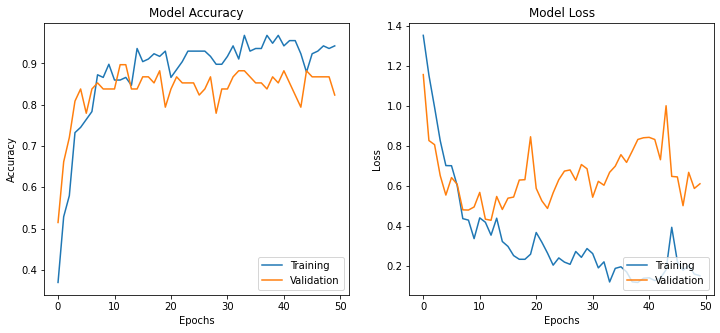

In [21]:
fig, ax = plot.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax[0].plot(hist.history['accuracy'])
ax[0].plot(hist.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend(['Training','Validation'],loc='lower right')



ax[1].plot(hist.history['loss'])
ax[1].plot(hist.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
ax[1].legend(['Training','Validation'],loc='lower right')







plot.show()


In [22]:
#Edit model to try data augmentation layer - RandomZoom

model = tf.keras.Sequential()

#Adding Data augmentation layers - flip, rotate, zoom

#model.add(tf.keras.layers.RandomFlip(input_shape=(64,64,3)))
#model.add(tf.keras.layers.RandomRotation((0.3)))
model.add(tf.keras.layers.RandomZoom(0.2)) #active layer


model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(5, 5),
    activation='relu',
    input_shape=(64,64,3)))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))    
model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(5, 5),
    activation='relu',
    ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(tf.keras.layers.Conv2D(
    filters=128,
    kernel_size=(5, 5),
    activation='relu',
    ))
    
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))  
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=200, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

In [24]:
hist = model.fit(x_train_norm,y_train,epochs=50,validation_split=0.3)

Epoch 1/50
5/5 [==============================] - 3s 335ms/step - loss: 1.3511 - accuracy: 0.3439 - val_loss: 1.1755 - val_accuracy: 0.3824
Epoch 2/50
5/5 [==============================] - 1s 260ms/step - loss: 1.1297 - accuracy: 0.4841 - val_loss: 1.0439 - val_accuracy: 0.5441
Epoch 3/50
5/5 [==============================] - 2s 313ms/step - loss: 1.0070 - accuracy: 0.5605 - val_loss: 0.7350 - val_accuracy: 0.7206
Epoch 4/50
5/5 [==============================] - 2s 338ms/step - loss: 1.0040 - accuracy: 0.6306 - val_loss: 0.9053 - val_accuracy: 0.6176
Epoch 5/50
5/5 [==============================] - 2s 353ms/step - loss: 0.9417 - accuracy: 0.5860 - val_loss: 0.8079 - val_accuracy: 0.6765
Epoch 6/50
5/5 [==============================] - 1s 286ms/step - loss: 0.7537 - accuracy: 0.7516 - val_loss: 0.6241 - val_accuracy: 0.8235
Epoch 7/50
5/5 [==============================] - 1s 277ms/step - loss: 0.6938 - accuracy: 0.7580 - val_loss: 0.5499 - val_accuracy: 0.8382
Epoch 8/50
5/5 [====

In [25]:
loss, accuracy = model.evaluate(x_test_norm,y_test)

AccuracyList.append(accuracy)
LossList.append(loss)

#accuracy for this edited model dropped

3/3 [==============================] - 0s 45ms/step - loss: 0.7331 - accuracy: 0.8800


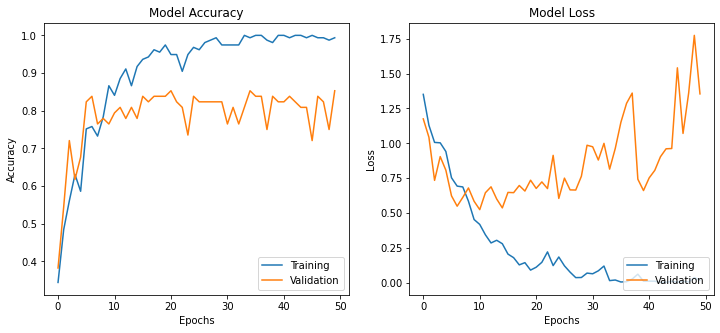

In [26]:
fig, ax = plot.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax[0].plot(hist.history['accuracy'])
ax[0].plot(hist.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend(['Training','Validation'],loc='lower right')



ax[1].plot(hist.history['loss'])
ax[1].plot(hist.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
ax[1].legend(['Training','Validation'],loc='lower right')







plot.show()


In [27]:
#Edit model to use all data augmentation layers 

model = tf.keras.Sequential()

#Data augmentation layers - flip, rotate, zoom
model.add(tf.keras.layers.RandomFlip(input_shape=(64,64,3)))
model.add(tf.keras.layers.RandomRotation((0.3)))
model.add(tf.keras.layers.RandomZoom(0.2))


model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(5, 5),
    activation='relu',
    input_shape=(64,64,3)))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))    
model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(5, 5),
    activation='relu',
    ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(tf.keras.layers.Conv2D(
    filters=128,
    kernel_size=(5, 5),
    activation='relu',
    ))
    
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))  
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=200, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

In [29]:
hist = model.fit(x_train_norm,y_train,epochs=50,validation_split=0.3)

Epoch 1/50
5/5 [==============================] - 3s 332ms/step - loss: 1.4040 - accuracy: 0.2675 - val_loss: 1.3022 - val_accuracy: 0.4559
Epoch 2/50
5/5 [==============================] - 1s 275ms/step - loss: 1.3149 - accuracy: 0.4204 - val_loss: 1.1829 - val_accuracy: 0.5588
Epoch 3/50
5/5 [==============================] - 1s 287ms/step - loss: 1.1603 - accuracy: 0.5414 - val_loss: 0.9492 - val_accuracy: 0.5588
Epoch 4/50
5/5 [==============================] - 1s 294ms/step - loss: 1.0506 - accuracy: 0.5924 - val_loss: 0.9736 - val_accuracy: 0.6029
Epoch 5/50
5/5 [==============================] - 1s 302ms/step - loss: 0.9511 - accuracy: 0.6497 - val_loss: 0.8368 - val_accuracy: 0.7059
Epoch 6/50
5/5 [==============================] - 1s 303ms/step - loss: 0.8825 - accuracy: 0.6752 - val_loss: 0.7759 - val_accuracy: 0.7794
Epoch 7/50
5/5 [==============================] - 1s 295ms/step - loss: 0.7686 - accuracy: 0.7325 - val_loss: 0.6305 - val_accuracy: 0.8382
Epoch 8/50
5/5 [====

In [30]:
loss, accuracy = model.evaluate(x_test_norm,y_test)

AccuracyList.append(accuracy)
LossList.append(loss)

#accuracy for this model improved with more data augmentation layers

3/3 [==============================] - 0s 54ms/step - loss: 0.2664 - accuracy: 0.9467


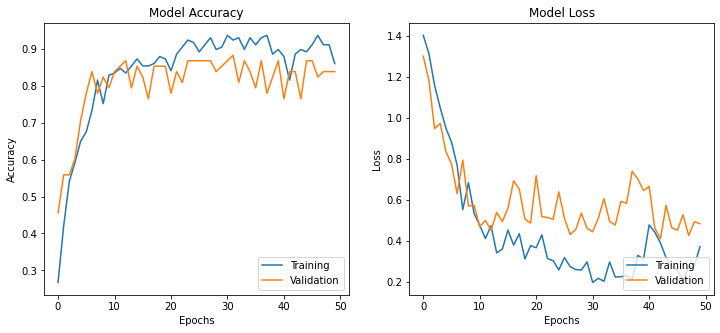

In [31]:
fig, ax = plot.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax[0].plot(hist.history['accuracy'])
ax[0].plot(hist.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend(['Training','Validation'],loc='lower right')



ax[1].plot(hist.history['loss'])
ax[1].plot(hist.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
ax[1].legend(['Training','Validation'],loc='lower right')







plot.show()


In [32]:
df1 = pd.DataFrame(zip(AccuracyList,LossList), columns=['Accuracy','Loss'])
df1

#To observe the evaluation accuracy for all the models above 

#Result
#Accuracy	Loss
#0	0.880000	1.056777 (starting model, no data aug layer)
#1	0.920000	0.441191 (Flip only)
#2	0.933333	0.358189 (Rotate only)
#3	0.880000	0.733130 (Zoom only)
#4	0.946667	0.266393 (Flip, Rotate, Zoom)

#Model that yields the highest accuracy (0.946667) is last iteration (row index 4) 
    #with all data augmentation layers.

,Accuracy,Loss
0,0.880000,1.056777
1,0.920000,0.441191
2,0.933333,0.358189
3,0.880000,0.733130
4,0.946667,0.266393


# Observations and Conclusion

<h4>Sample Size</h4>

We observe that sample sizes are rather small after splitting them to train and test samples. It might be that the model is overfitting. To overcome the overfitting problems, we used data augmentation to "create" more samples for the training of the model.

<h4>Data Augmentation Methods</h4>

Also, we noticed that different data augmentation methods yield different results. In the above, we tested each layer individually, and as a whole group, to see its effect on model accuracy. Not seen in above, we also tested the layers in combinations of two (see Other Experiments below). 
- Flip + Rotate: loss: 0.3675 - accuracy: 0.8933
- Rotate + Zoom: lloss: 0.6099 - accuracy: 0.8000
- Flip + Zoom: loss: 0.3332 - accuracy: 0.8933

The highest accuracy of models with combinations of two is still lower than the above highest accuracy of 0.946667 (with all three layers).

Based on our experimentation, using three layers is best suited for our use case.

<h4>Number of Epochs</h4>

Additionally, we should also use a suitable amount of epochs as too many / too few epochs might cause underfitting or overfitting issues. The most "efficient" number should be when the values of loss hits the lowest as per graph plotted. We tested the optimal number of epochs using the most efficient model (3 data augmentation layers).
- Epoch 30: loss: 0.4406 - accuracy: 0.8400 (see Other Experiments below)
- Epoch 50: loss: 0.2664 - accuracy: 0.9467 (see above)
- Epoch 60: loss: 0.4767 - accuracy: 0.9333 (see Other Experiments below)

Based on our experimentation, using 50 epochs is best suited for our use case.

<h4>Type of Optimizer</h4>

Furthermore, we experimented with different optimizers to see their effect on our model. For this experiment, we used the basic model (without data augmentation layers, 50 epochs). 
- sgd: loss: 0.4554 - accuracy: 0.8667 (see Other Experiments below)
- Adagrad: loss: 1.0208 - accuracy: 0.6933 (see Other Experiments below)
- RMSprop: loss: 1.4140 - accuracy: 0.8533 (see Other Experiments below)
- adadelta: loss: 1.3067 - accuracy: 0.3333 (see Other Experiments below)
- adam: loss: 1.0568 - accuracy: 0.8800 (see above)

Based on our experimentation, adam is still the best optimizer for our model.

<h4>Conclusion</h4>

In conclusion, we would use the model iteration with all three data augmentation layers, an optimal number of 50 epochs, and the adam optimizer for model compilation. This combination yields the best accuracy for our use case.

# Other Experiments

We tried other iterations of the model, but we're placing the workings at the end to avoid over-training the model, which would result in lower than expected accuracy.

In [33]:
#FLIP, ROTATE data augmentation layers 
model = tf.keras.Sequential()

#Data augmentation layers - flip, rotate, zoom
model.add(tf.keras.layers.RandomFlip(input_shape=(64,64,3)))
model.add(tf.keras.layers.RandomRotation((0.3)))
#model.add(tf.keras.layers.RandomZoom(0.2))


model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(5, 5),
    activation='relu',
    input_shape=(64,64,3)))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))    
model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(5, 5),
    activation='relu',
    ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(tf.keras.layers.Conv2D(
    filters=128,
    kernel_size=(5, 5),
    activation='relu',
    ))
    
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))  
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=200, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

hist = model.fit(x_train_norm,y_train,epochs=50,validation_split=0.3)

loss, accuracy = model.evaluate(x_test_norm,y_test)


Epoch 1/50
5/5 [==============================] - 4s 394ms/step - loss: 1.3901 - accuracy: 0.2739 - val_loss: 1.2487 - val_accuracy: 0.3235
Epoch 2/50
5/5 [==============================] - 1s 283ms/step - loss: 1.3274 - accuracy: 0.4013 - val_loss: 1.2090 - val_accuracy: 0.5735
Epoch 3/50
5/5 [==============================] - 1s 287ms/step - loss: 1.1623 - accuracy: 0.5541 - val_loss: 1.0057 - val_accuracy: 0.5735
Epoch 4/50
5/5 [==============================] - 1s 296ms/step - loss: 1.1148 - accuracy: 0.5796 - val_loss: 0.9608 - val_accuracy: 0.6029
Epoch 5/50
5/5 [==============================] - 1s 286ms/step - loss: 1.0224 - accuracy: 0.6178 - val_loss: 0.9273 - val_accuracy: 0.6618
Epoch 6/50
5/5 [==============================] - 1s 284ms/step - loss: 0.8769 - accuracy: 0.6752 - val_loss: 0.8264 - val_accuracy: 0.6618
Epoch 7/50
5/5 [==============================] - 1s 294ms/step - loss: 0.8396 - accuracy: 0.6561 - val_loss: 0.7844 - val_accuracy: 0.6618
Epoch 8/50
5/5 [====

In [34]:
#ROTATE, ZOOM data augmentation layers  
model = tf.keras.Sequential()

#Data augmentation layers - flip, rotate, zoom
#model.add(tf.keras.layers.RandomFlip(input_shape=(64,64,3)))
model.add(tf.keras.layers.RandomRotation((0.3)))
model.add(tf.keras.layers.RandomZoom(0.2))


model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(5, 5),
    activation='relu',
    input_shape=(64,64,3)))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))    
model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(5, 5),
    activation='relu',
    ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(tf.keras.layers.Conv2D(
    filters=128,
    kernel_size=(5, 5),
    activation='relu',
    ))
    
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))  
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=200, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

hist = model.fit(x_train_norm,y_train,epochs=50,validation_split=0.3)

loss, accuracy = model.evaluate(x_test_norm,y_test)


Epoch 1/50
5/5 [==============================] - 3s 330ms/step - loss: 1.3784 - accuracy: 0.2739 - val_loss: 1.2318 - val_accuracy: 0.3529
Epoch 2/50
5/5 [==============================] - 1s 295ms/step - loss: 1.2687 - accuracy: 0.4395 - val_loss: 0.9658 - val_accuracy: 0.7794
Epoch 3/50
5/5 [==============================] - 1s 289ms/step - loss: 0.9253 - accuracy: 0.6943 - val_loss: 0.5016 - val_accuracy: 0.8235
Epoch 4/50
5/5 [==============================] - 1s 312ms/step - loss: 0.7016 - accuracy: 0.7898 - val_loss: 0.5406 - val_accuracy: 0.8235
Epoch 5/50
5/5 [==============================] - 1s 277ms/step - loss: 0.5890 - accuracy: 0.7962 - val_loss: 0.5046 - val_accuracy: 0.8088
Epoch 6/50
5/5 [==============================] - 1s 272ms/step - loss: 0.5100 - accuracy: 0.8089 - val_loss: 0.5316 - val_accuracy: 0.8382
Epoch 7/50
5/5 [==============================] - 1s 274ms/step - loss: 0.5328 - accuracy: 0.8408 - val_loss: 0.4656 - val_accuracy: 0.8529
Epoch 8/50
5/5 [====

In [35]:
#FLIP, ZOOM data augmentation layers 
model = tf.keras.Sequential()

#Data augmentation layers - flip, rotate, zoom
model.add(tf.keras.layers.RandomFlip(input_shape=(64,64,3)))
#model.add(tf.keras.layers.RandomRotation((0.3)))
model.add(tf.keras.layers.RandomZoom(0.2))


model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(5, 5),
    activation='relu',
    input_shape=(64,64,3)))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))    
model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(5, 5),
    activation='relu',
    ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(tf.keras.layers.Conv2D(
    filters=128,
    kernel_size=(5, 5),
    activation='relu',
    ))
    
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))  
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=200, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

hist = model.fit(x_train_norm,y_train,epochs=50,validation_split=0.3)

loss, accuracy = model.evaluate(x_test_norm,y_test)


Epoch 1/50
5/5 [==============================] - 3s 328ms/step - loss: 1.3786 - accuracy: 0.3503 - val_loss: 1.3667 - val_accuracy: 0.3382
Epoch 2/50
5/5 [==============================] - 1s 263ms/step - loss: 1.3263 - accuracy: 0.3949 - val_loss: 1.1316 - val_accuracy: 0.3676
Epoch 3/50
5/5 [==============================] - 1s 276ms/step - loss: 1.1013 - accuracy: 0.5223 - val_loss: 0.8733 - val_accuracy: 0.5882
Epoch 4/50
5/5 [==============================] - 1s 276ms/step - loss: 1.0108 - accuracy: 0.5796 - val_loss: 0.8312 - val_accuracy: 0.7647
Epoch 5/50
5/5 [==============================] - 1s 279ms/step - loss: 0.8107 - accuracy: 0.7580 - val_loss: 0.6475 - val_accuracy: 0.8529
Epoch 6/50
5/5 [==============================] - 1s 280ms/step - loss: 0.7128 - accuracy: 0.7389 - val_loss: 0.6040 - val_accuracy: 0.8235
Epoch 7/50
5/5 [==============================] - 1s 290ms/step - loss: 0.6545 - accuracy: 0.7643 - val_loss: 0.6166 - val_accuracy: 0.8235
Epoch 8/50
5/5 [====

In [38]:
#Using most efficient model
#Testing epoch 30

model = tf.keras.Sequential()

#Data augmentation layers - flip, rotate, zoom
model.add(tf.keras.layers.RandomFlip(input_shape=(64,64,3)))
model.add(tf.keras.layers.RandomRotation((0.3)))
model.add(tf.keras.layers.RandomZoom(0.2))

model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(5, 5),
    activation='relu',
    input_shape=(64,64,3)))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))    
model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(5, 5),
    activation='relu',
    ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(tf.keras.layers.Conv2D(
    filters=128,
    kernel_size=(5, 5),
    activation='relu',
    ))
    
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))  
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=200, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

hist = model.fit(x_train_norm,y_train,epochs=30,validation_split=0.3)

loss, accuracy = model.evaluate(x_test_norm,y_test)

Epoch 1/30
5/5 [==============================] - 3s 351ms/step - loss: 1.3714 - accuracy: 0.3376 - val_loss: 1.3172 - val_accuracy: 0.3382
Epoch 2/30
5/5 [==============================] - 1s 283ms/step - loss: 1.3151 - accuracy: 0.4268 - val_loss: 1.0666 - val_accuracy: 0.6324
Epoch 3/30
5/5 [==============================] - 1s 276ms/step - loss: 1.0769 - accuracy: 0.5669 - val_loss: 0.7755 - val_accuracy: 0.7353
Epoch 4/30
5/5 [==============================] - 1s 273ms/step - loss: 0.8334 - accuracy: 0.6497 - val_loss: 0.8667 - val_accuracy: 0.7500
Epoch 5/30
5/5 [==============================] - 1s 265ms/step - loss: 0.7654 - accuracy: 0.7580 - val_loss: 0.8147 - val_accuracy: 0.7500
Epoch 6/30
5/5 [==============================] - 1s 264ms/step - loss: 0.7677 - accuracy: 0.7643 - val_loss: 0.7010 - val_accuracy: 0.7941
Epoch 7/30
5/5 [==============================] - 1s 268ms/step - loss: 0.6370 - accuracy: 0.8025 - val_loss: 0.5436 - val_accuracy: 0.8529
Epoch 8/30
5/5 [====

In [7]:
#Using most efficient model
#Testing epoch 60

model = tf.keras.Sequential()

#Data augmentation layers - flip, rotate, zoom
model.add(tf.keras.layers.RandomFlip(input_shape=(64,64,3)))
model.add(tf.keras.layers.RandomRotation((0.3)))
model.add(tf.keras.layers.RandomZoom(0.2))

model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(5, 5),
    activation='relu',
    input_shape=(64,64,3)))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))    
model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(5, 5),
    activation='relu',
    ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(tf.keras.layers.Conv2D(
    filters=128,
    kernel_size=(5, 5),
    activation='relu',
    ))
    
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))  
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=200, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

hist = model.fit(x_train_norm,y_train,epochs=60,validation_split=0.3)

loss, accuracy = model.evaluate(x_test_norm,y_test)

Epoch 1/60
5/5 [==============================] - 4s 354ms/step - loss: 1.3841 - accuracy: 0.2675 - val_loss: 1.2685 - val_accuracy: 0.4559
Epoch 2/60
5/5 [==============================] - 1s 301ms/step - loss: 1.2709 - accuracy: 0.4395 - val_loss: 1.0067 - val_accuracy: 0.6029
Epoch 3/60
5/5 [==============================] - 1s 264ms/step - loss: 1.1026 - accuracy: 0.5860 - val_loss: 0.6610 - val_accuracy: 0.7353
Epoch 4/60
5/5 [==============================] - 1s 255ms/step - loss: 0.9196 - accuracy: 0.5987 - val_loss: 0.7727 - val_accuracy: 0.7353
Epoch 5/60
5/5 [==============================] - 1s 264ms/step - loss: 0.8182 - accuracy: 0.7580 - val_loss: 0.6638 - val_accuracy: 0.7500
Epoch 6/60
5/5 [==============================] - 1s 259ms/step - loss: 0.6907 - accuracy: 0.7389 - val_loss: 0.5255 - val_accuracy: 0.8235
Epoch 7/60
5/5 [==============================] - 1s 264ms/step - loss: 0.6688 - accuracy: 0.7325 - val_loss: 0.5428 - val_accuracy: 0.8088
Epoch 8/60
5/5 [====

In [8]:
# try different optimizer SGD
# use the basic model without data augmentation
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(5, 5),
    activation='relu',
    input_shape=(64,64,3)))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))    
model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(5, 5),
    activation='relu',
    ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))    
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=250, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'sgd',metrics = ['accuracy'])

hist = model.fit(x_train_norm,y_train,epochs=50,validation_split=0.3)

loss, accuracy = model.evaluate(x_test_norm,y_test)

Epoch 1/50
5/5 [==============================] - 2s 255ms/step - loss: 1.3904 - accuracy: 0.2739 - val_loss: 1.3040 - val_accuracy: 0.5000
Epoch 2/50
5/5 [==============================] - 1s 201ms/step - loss: 1.3461 - accuracy: 0.3758 - val_loss: 1.2908 - val_accuracy: 0.5147
Epoch 3/50
5/5 [==============================] - 1s 212ms/step - loss: 1.3444 - accuracy: 0.3567 - val_loss: 1.2730 - val_accuracy: 0.5294
Epoch 4/50
5/5 [==============================] - 1s 210ms/step - loss: 1.3488 - accuracy: 0.4013 - val_loss: 1.2790 - val_accuracy: 0.5294
Epoch 5/50
5/5 [==============================] - 1s 229ms/step - loss: 1.3168 - accuracy: 0.4076 - val_loss: 1.2506 - val_accuracy: 0.5147
Epoch 6/50
5/5 [==============================] - 1s 213ms/step - loss: 1.2934 - accuracy: 0.5096 - val_loss: 1.2349 - val_accuracy: 0.5147
Epoch 7/50
5/5 [==============================] - 1s 200ms/step - loss: 1.2676 - accuracy: 0.3949 - val_loss: 1.2001 - val_accuracy: 0.5294
Epoch 8/50
5/5 [====

In [9]:
# try different optimizer Adagrad
# use the basic model without data augmentation
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(5, 5),
    activation='relu',
    input_shape=(64,64,3)))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))    
model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(5, 5),
    activation='relu',
    ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))    
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=250, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
   
hist = model.fit(x_train_norm,y_train,epochs=50,validation_split=0.3)

loss, accuracy = model.evaluate(x_test_norm,y_test)

Epoch 1/50
5/5 [==============================] - 2s 256ms/step - loss: 1.4611 - accuracy: 0.1847 - val_loss: 1.4145 - val_accuracy: 0.0882
Epoch 2/50
5/5 [==============================] - 1s 201ms/step - loss: 1.4246 - accuracy: 0.2166 - val_loss: 1.3822 - val_accuracy: 0.2941
Epoch 3/50
5/5 [==============================] - 1s 204ms/step - loss: 1.4116 - accuracy: 0.2102 - val_loss: 1.3645 - val_accuracy: 0.3824
Epoch 4/50
5/5 [==============================] - 1s 236ms/step - loss: 1.3889 - accuracy: 0.2548 - val_loss: 1.3529 - val_accuracy: 0.3088
Epoch 5/50
5/5 [==============================] - 1s 196ms/step - loss: 1.3626 - accuracy: 0.2930 - val_loss: 1.3375 - val_accuracy: 0.3971
Epoch 6/50
5/5 [==============================] - 1s 208ms/step - loss: 1.3485 - accuracy: 0.3185 - val_loss: 1.3267 - val_accuracy: 0.4559
Epoch 7/50
5/5 [==============================] - 1s 208ms/step - loss: 1.3432 - accuracy: 0.3121 - val_loss: 1.3135 - val_accuracy: 0.4118
Epoch 8/50
5/5 [====

In [11]:
# try different optimizer RMSprop
# use the basic model without data augmentation
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(5, 5),
    activation='relu',
    input_shape=(64,64,3)))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))    
model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(5, 5),
    activation='relu',
    ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))    
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=250, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

RMSprop = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
model.compile(loss="categorical_crossentropy",optimizer='RMSprop',metrics=['accuracy'])
   
hist = model.fit(x_train_norm,y_train,epochs=50,validation_split=0.3)

loss, accuracy = model.evaluate(x_test_norm,y_test)

Epoch 1/50
5/5 [==============================] - 3s 296ms/step - loss: 1.8925 - accuracy: 0.2739 - val_loss: 1.2076 - val_accuracy: 0.5441
Epoch 2/50
5/5 [==============================] - 1s 212ms/step - loss: 1.6032 - accuracy: 0.3758 - val_loss: 1.1725 - val_accuracy: 0.5735
Epoch 3/50
5/5 [==============================] - 1s 232ms/step - loss: 1.2649 - accuracy: 0.5032 - val_loss: 1.1481 - val_accuracy: 0.3529
Epoch 4/50
5/5 [==============================] - 1s 218ms/step - loss: 1.1070 - accuracy: 0.5414 - val_loss: 1.3207 - val_accuracy: 0.3529
Epoch 5/50
5/5 [==============================] - 1s 219ms/step - loss: 1.1182 - accuracy: 0.5924 - val_loss: 0.8353 - val_accuracy: 0.7059
Epoch 6/50
5/5 [==============================] - 1s 230ms/step - loss: 0.9573 - accuracy: 0.6115 - val_loss: 1.1842 - val_accuracy: 0.5000
Epoch 7/50
5/5 [==============================] - 1s 265ms/step - loss: 0.9672 - accuracy: 0.6433 - val_loss: 0.6650 - val_accuracy: 0.7794
Epoch 8/50
5/5 [====

In [12]:
# try different optimizer adadelta
# use the basic model without data augmentation
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(5, 5),
    activation='relu',
    input_shape=(64,64,3)))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))    
model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(5, 5),
    activation='relu',
    ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))    
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=250, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
   
hist = model.fit(x_train_norm,y_train,epochs=50,validation_split=0.3)

loss, accuracy = model.evaluate(x_test_norm,y_test)

Epoch 1/50
5/5 [==============================] - 2s 278ms/step - loss: 1.4762 - accuracy: 0.1911 - val_loss: 1.4455 - val_accuracy: 0.1912
Epoch 2/50
5/5 [==============================] - 1s 205ms/step - loss: 1.4578 - accuracy: 0.2166 - val_loss: 1.4405 - val_accuracy: 0.1765
Epoch 3/50
5/5 [==============================] - 1s 211ms/step - loss: 1.4263 - accuracy: 0.2548 - val_loss: 1.4343 - val_accuracy: 0.1912
Epoch 4/50
5/5 [==============================] - 1s 221ms/step - loss: 1.4550 - accuracy: 0.2484 - val_loss: 1.4295 - val_accuracy: 0.1912
Epoch 5/50
5/5 [==============================] - 1s 203ms/step - loss: 1.4802 - accuracy: 0.1847 - val_loss: 1.4245 - val_accuracy: 0.1912
Epoch 6/50
5/5 [==============================] - 1s 210ms/step - loss: 1.4504 - accuracy: 0.2484 - val_loss: 1.4204 - val_accuracy: 0.2353
Epoch 7/50
5/5 [==============================] - 1s 202ms/step - loss: 1.4515 - accuracy: 0.2102 - val_loss: 1.4150 - val_accuracy: 0.2353
Epoch 8/50
5/5 [====